In [1]:
import numpy as np
import matplotlib.pyplot as plt
import arrow
import datetime
import xarray as xr
import os
import cmocean.cm as cm
import matplotlib.cm as cma
import scipy.interpolate as interp
from matplotlib.collections import PatchCollection
import matplotlib.dates as mpl_dates
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FormatStrFormatter
import datetime as dt
cbar = cm.deep

### Functions

In [2]:
def get_data(datafile):
    saltf = datafile.final_salt
    transpf = datafile.final_transp
    lonf = datafile.final_lon
    latf = datafile.final_lat
    depthf = datafile.final_depth
    sectionf = datafile.final_section
    zf = datafile.final_z
    tempf = datafile.final_temp
    
    return saltf,transpf,lonf,latf,depthf,sectionf,zf,tempf

In [3]:

def get_datat(datafile,section, starttime, endtime):
    final_section = datafile.final_section
    final_transport = datafile.final_transp
    transports = np.sum(np.where(final_section == section, final_transport, 0)) 
    return transports/(endtime-starttime+1)

In [4]:
#Function to extract data from 1 section
def get_secdata(datafile,sectionnum):
    
    variables = ['final_salt','final_transp','final_lon','final_lat','final_depth','final_section','final_z','final_temp','init_lon','init_z','init_salt','init_temp','init_transp','final_age','final_dens','init_dens']
    
    dict_var = {}
    
    idx = np.where(datafile['final_section']==sectionnum)
    
    for var in variables:
        if var == 'final_age':
            agetd = datafile[var].values
            agehr = agetd.astype('float64')/(10**9*3600)
            age = agehr[idx]
            dict_var[var] = age
        else:
            data_sec = datafile[var]
            dict_var[var] = data_sec[idx]
        
    
    return dict_var

In [5]:
#Function to extract data from 1 section

def splitsec(sectionfull,sectionnum,transport,longitude,depth,z,salt,temp):
    idx = np.where(sectionfull==sectionnum)
    transp_sec = transport[idx]
    lon_sec = longitude[idx]
    depth_sec = depth[idx]
    zf_sec = z[idx]
    salt_sec = salt[idx]
    temp_sec = temp[idx]
    return transp_sec,lon_sec,depth_sec, zf_sec,salt_sec,temp_sec

In [6]:
def plotTS(axn,var,lonsec,zsec,varsec,lonW,lonE,depi,time,title,cblabel,ylabel,vmin=None,vmax=None):
    
    cmap = cm.deep
    
    m2lon = ((u_lons[lonE]-u_lons[lonW])/(mesh.e2f[0, latgridi, lonW:lonE].sum())).values #degrees/m
    
    arrw,xe,ye,im = axn.hist2d(lonsec/m2lon,df(zsec)[0],weights=varsec,cmap=cmap,bins=[np.array(f_lons[lonW:lonE:1]/m2lon),w_depths[0,0:depi]])
    arrnw,xe2,ye2,im2 = axn.hist2d(lonsec/m2lon,df(zsec)[0],cmap=cmap,bins=[np.array(f_lons[lonW:lonE:1]/m2lon),w_depths[0,0:depi]])
    
    arr3 = arrw/arrnw
    
    X,Y = np.meshgrid(xe,ye)
    
    im = axn.pcolormesh(X,Y,arr3.T,vmin=vmin,vmax=vmax)
    axn.set_xlabel('Longitude (°E)')
    axn.set_title(title)
    axn.invert_yaxis()
    axn.set_xticks(np.linspace(f_lons[lonW]/m2lon,f_lons[lonE-1]/m2lon,4))
    axn.set_xticklabels(['{:.2f}'.format(label) for label in np.linspace(f_lons[lonW],f_lons[lonE-1],4)])
    
    if cblabel == True:
        cb = fig.colorbar(im,ax=axn)
        
        if var == 'temp':
            cb.set_label('Temperature (°C)')
        if var == 'sal':
            cb.set_label('Salinity (g/kg)')
        if var =='age':
            cb.set_label('Age (hr)')
            
    if ylabel == True:
        axn.set_ylabel('Depth (m)')

In [7]:
data = xr.open_dataset('/ocean/cstang/MOAD/analysis-camryn/Ariane/for_jan18/for_straight_01jan18_s7t28/ariane_positions_quantitative.nc')
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')

lonW = 308
lonE = 327
latgridi = 300
latgridf = latgridi-1
fmask = mesh.fmask[0, :, latgridi]
tmask = mesh.tmask[0] 
    
lons = data.init_lon[(data.final_section != 0)]
    
f_lons = mesh.glamf[0, latgridi] 
u_lons = mesh.glamv[0, latgridi]
w_depths = mesh.gdepw_1d

m2lon = ((u_lons[lonE]-u_lons[lonW])/(mesh.e2f[0, latgridi, lonW:lonE].sum())).values #degrees/m
print(m2lon)

df = interp.interp1d(mesh.z,mesh.gdepw_1d) # Interpolate to get same binning scheme as SalishSeaCast

1.0360032205105405e-05


### Import data

In [8]:
datafvs = xr.open_dataset('/ocean/cstang/MOAD/analysis-camryn/Ariane/for_jan18/for_straight_01jan18_s7t28/ariane_positions_quantitative.nc')
datafvs07 = xr.open_dataset('/ocean/cstang/MOAD/analysis-camryn/Ariane/for_jan18/for_straight_01jul18_s7t21/ariane_positions_quantitative.nc')
datafhspr = xr.open_dataset('/ocean/cstang/MOAD/analysis-camryn/Ariane/forharoPR_jan18/for_straight_01jan18_s7t28/ariane_positions_quantitative.nc')

lonWros=306
lonEros=329

lonWpr = 170
lonEpr = 230

In [9]:
databpr = xr.open_dataset('/ocean/cstang/MOAD/analysis-camryn/Ariane/for_jan18_PR/for_straight_01jan18_s7t28/ariane_positions_quantitative.nc')

harobpr = get_secdata(databpr,6)
mdbpr = get_secdata(databpr,0)
prfhs = get_secdata(datafhspr,6)


/tmp/ipykernel_23070/359763449.py:10: RuntimeWarning: invalid value encountered in divide
  arr3 = arrw/arrnw
/tmp/ipykernel_23070/359763449.py:10: RuntimeWarning: invalid value encountered in divide
  arr3 = arrw/arrnw


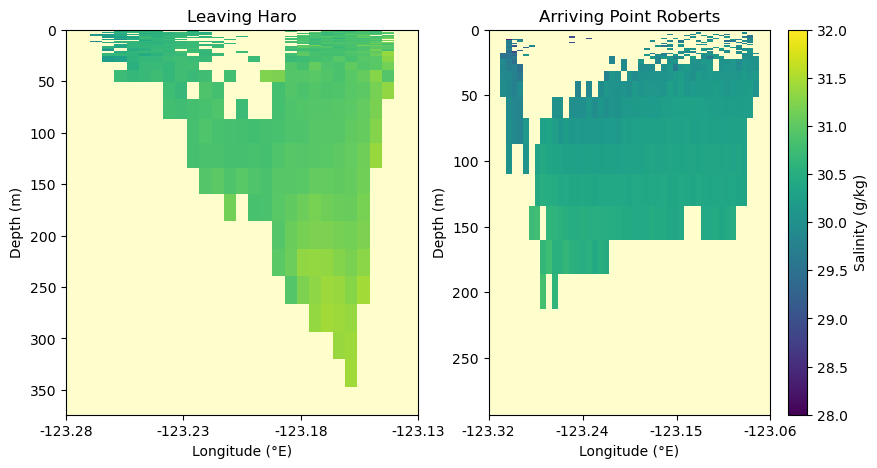

In [10]:
fig,[ax1,ax2] = plt.subplots(1,2,figsize=(10,5))

title1 = 'Leaving Haro'
title2 = 'Arriving Point Roberts'

lonWharo = 215
lonEharo = 245

lonWpr = 207
lonEpr = 257

timeb = 169
time = 168

smin= 28
smax = 32

plotTS(ax1,'sal',prfhs['init_lon'],prfhs['init_z'],prfhs['init_salt'],lonWharo,lonEharo,38,timeb,title1,False,True,vmin=smin,vmax=smax)
plotTS(ax2,'sal',prfhs['final_lon'],prfhs['final_z'],prfhs['final_salt'],lonWpr,lonEpr,35,time,title2,True,True,vmin=smin,vmax=smax)

/tmp/ipykernel_23070/359763449.py:10: RuntimeWarning: invalid value encountered in divide
  arr3 = arrw/arrnw
/tmp/ipykernel_23070/359763449.py:10: RuntimeWarning: invalid value encountered in divide
  arr3 = arrw/arrnw
/tmp/ipykernel_23070/359763449.py:10: RuntimeWarning: invalid value encountered in divide
  arr3 = arrw/arrnw
/tmp/ipykernel_23070/359763449.py:10: RuntimeWarning: invalid value encountered in divide
  arr3 = arrw/arrnw


Text(0.5, 0.98, 'Jan')

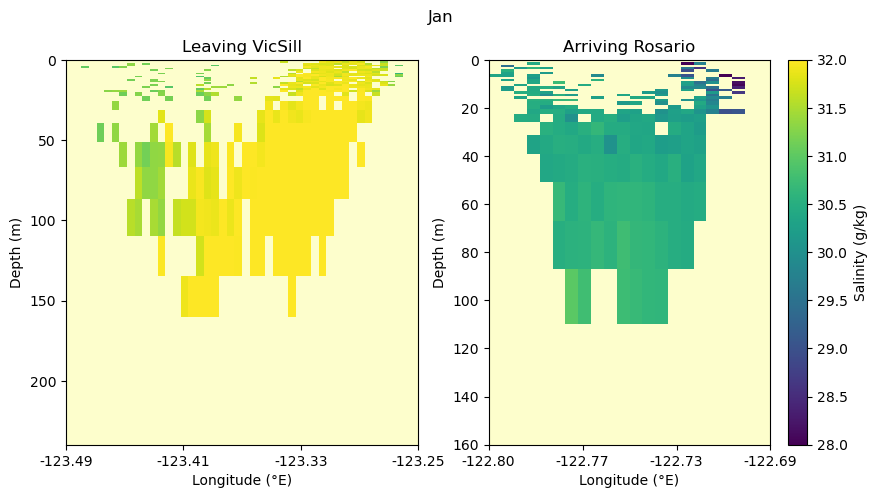

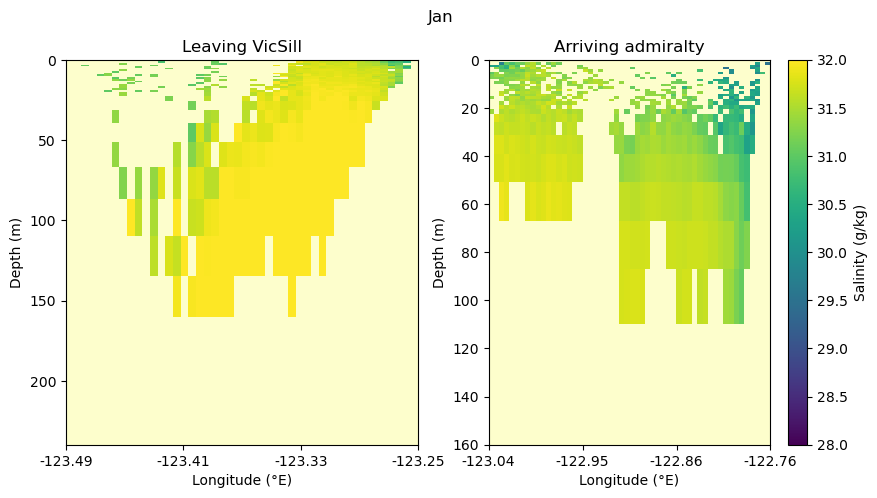

In [11]:
rosfvs = get_secdata(datafvs,4)
admfvs = get_secdata(datafvs,2)
lonWadm = 260
lonEadm = 315

title = 'Leaving VicSill'
title2 = 'Arriving Rosario'
title3 = 'Arriving admiralty'

lonWvs = 175
lonEvs = 222

fig,[ax1,ax2] = plt.subplots(1,2,figsize=(10,5))

plotTS(ax1,'sal',rosfvs['init_lon'],rosfvs['init_z'],rosfvs['init_salt'],lonWvs,lonEvs,33,time,title,False,True,vmin=smin,vmax=smax)
plotTS(ax2,'sal',rosfvs['final_lon'],rosfvs['final_z'],rosfvs['final_salt'],lonWros,lonEros,30,time,title2,True,True,vmin=smin,vmax=smax)
fig.suptitle('Jan')

fig,[ax1,ax2] = plt.subplots(1,2,figsize=(10,5))

plotTS(ax1,'sal',admfvs['init_lon'],admfvs['init_z'],admfvs['init_salt'],lonWvs,lonEvs,33,time,title,False,True,vmin=smin,vmax=smax)
plotTS(ax2,'sal',admfvs['final_lon'],admfvs['final_z'],admfvs['final_salt'],lonWadm,lonEadm,30,time,title3,True,True,vmin=smin,vmax=smax)
fig.suptitle('Jan')

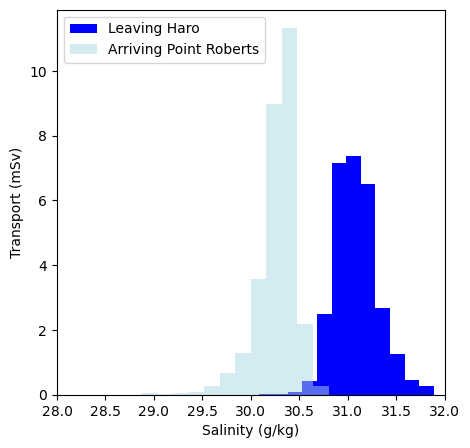

In [12]:
fig,ax = plt.subplots(1,1,figsize=(5,5))

ax.hist(prfhs['init_salt'],bins=15,weights=prfhs['init_transp']/time/1000,color='blue',label='Leaving Haro') #Divide by time to get transport, divide by 1000 to grt mSv
ax.hist(prfhs['final_salt'],bins=15,weights=prfhs['final_transp']/time/1000,alpha=0.5,color='lightblue',label='Arriving Point Roberts')
ax.set_xlim([28,32])
ax.set_ylabel('Transport (mSv)')
ax.set_xlabel('Salinity (g/kg)')
# ax.axvline(30.5,color='gray',ls='--')
ax.legend()

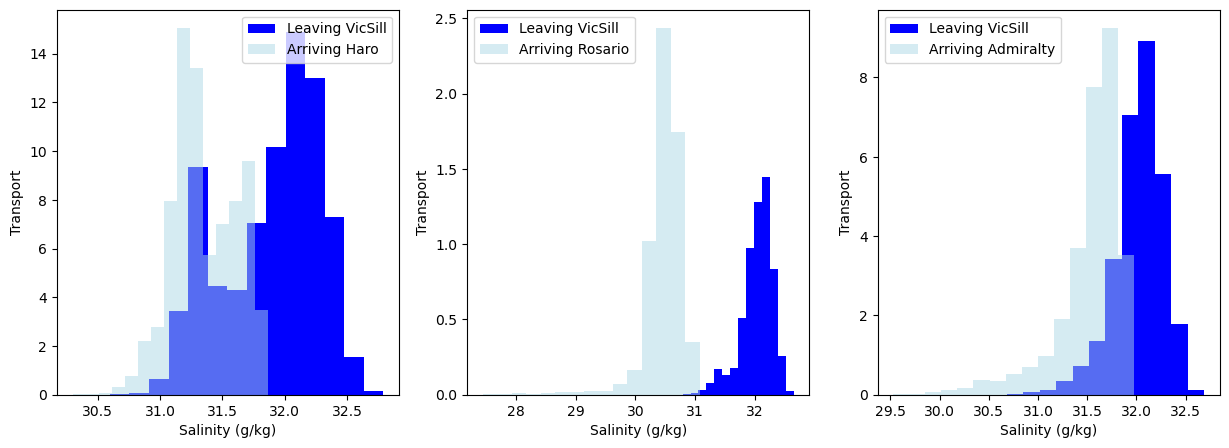

In [13]:
harofvs = get_secdata(datafvs,6)

fig,ax = plt.subplots(1,3,figsize=(15,5))

ax[1].hist(rosfvs['init_salt'],bins=15,weights=rosfvs['init_transp']/time/1000,color='blue',label='Leaving VicSill')
ax[1].hist(rosfvs['final_salt'],bins=15,weights=rosfvs['final_transp']/time/1000,color='lightblue',alpha=0.5,label='Arriving Rosario')
ax[1].set_ylabel('Transport')
ax[1].set_xlabel('Salinity (g/kg)')
ax[1].legend()
ax[0].hist(harofvs['init_salt'],bins=15,weights=harofvs['init_transp']/time/1000,color='blue',label='Leaving VicSill')
ax[0].hist(harofvs['final_salt'],bins=15,weights=harofvs['final_transp']/time/1000,color='lightblue',alpha=0.5,label='Arriving Haro')
ax[0].legend()
ax[0].set_ylabel('Transport')
ax[0].set_xlabel('Salinity (g/kg)')
ax[2].hist(admfvs['init_salt'],bins=15,weights=admfvs['init_transp']/time/1000,color='blue',label='Leaving VicSill')
ax[2].hist(admfvs['final_salt'],bins=15,weights=admfvs['final_transp']/time/1000,color='lightblue',alpha=0.5,label='Arriving Admiralty')
ax[2].set_ylabel('Transport')
ax[2].set_xlabel('Salinity (g/kg)')
ax[2].legend()

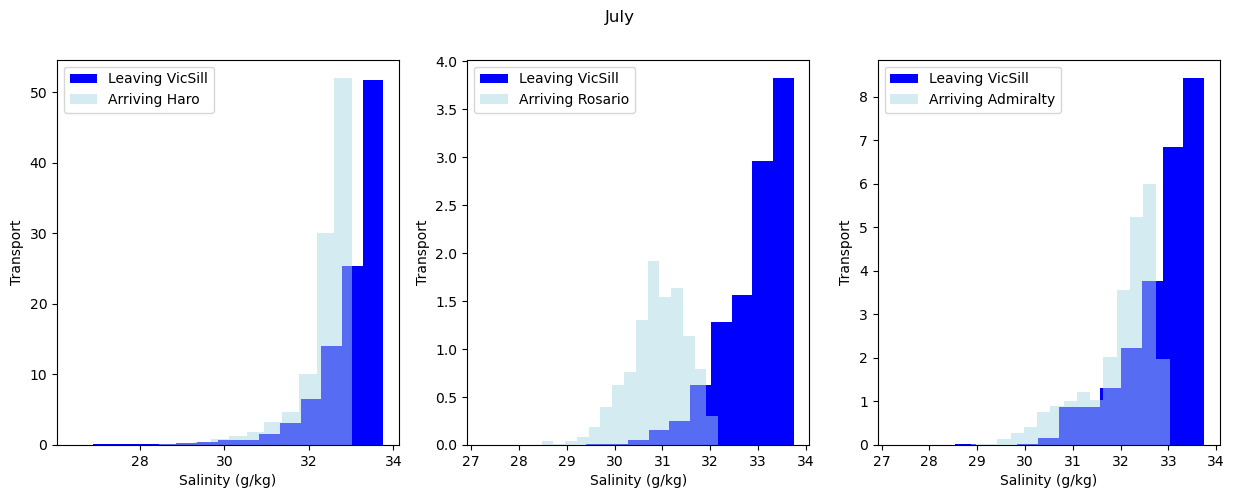

In [14]:
harofvs07 = get_secdata(datafvs07,6)
rosfvs07 = get_secdata(datafvs07,4)
admfvs07 = get_secdata(datafvs07,2)

fig,ax = plt.subplots(1,3,figsize=(15,5))

ax[1].hist(rosfvs07['init_salt'],bins=15,weights=rosfvs07['init_transp']/time/1000,color='blue',label='Leaving VicSill')
ax[1].hist(rosfvs07['final_salt'],bins=15,weights=rosfvs07['final_transp']/time/1000,color='lightblue',alpha=0.5,label='Arriving Rosario')
ax[1].set_ylabel('Transport')
ax[1].set_xlabel('Salinity (g/kg)')
ax[1].legend()
ax[0].hist(harofvs07['init_salt'],bins=15,weights=harofvs07['init_transp']/time/1000,color='blue',label='Leaving VicSill')
ax[0].hist(harofvs07['final_salt'],bins=15,weights=harofvs07['final_transp']/time/1000,color='lightblue',alpha=0.5,label='Arriving Haro')
ax[0].legend()
ax[0].set_ylabel('Transport')
ax[0].set_xlabel('Salinity (g/kg)')
fig.suptitle('July')
ax[2].hist(admfvs07['init_salt'],bins=15,weights=admfvs07['init_transp']/time/1000,color='blue',label='Leaving VicSill')
ax[2].hist(admfvs07['final_salt'],bins=15,weights=admfvs07['final_transp']/time/1000,color='lightblue',alpha=0.5,label='Arriving Admiralty')
ax[2].set_ylabel('Transport')
ax[2].set_xlabel('Salinity (g/kg)')
ax[2].legend()

In [15]:
#Calculating total inital and final salt flux

idx = np.where(datafvs['final_section']==4)
init_dens = datafvs['init_dens'][idx]
init_saltflux = 0
final_dens = datafvs['final_dens'][idx]
final_saltflux = 0

for i in range(len(rosfvs['init_salt'])):
    init_saltflux += rosfvs['init_salt'][i]*rosfvs['init_transp'][i]/time*init_dens[i]
    final_saltflux += rosfvs['final_salt'][i]*rosfvs['final_transp'][i]/time*final_dens[i]
    
print(init_saltflux.values)
print(final_saltflux.values)
print((init_saltflux.values-final_saltflux.values)/np.mean([init_saltflux.values,final_saltflux.values])*100,'%')

4820409.916756173
4366988.301856782
9.870511849171693 %


In [16]:
init_saltfluxh07 = 0
final_saltfluxh07 = 0
init_saltfluxh = 0
final_saltfluxh = 0
init_saltfluxr = 0
final_saltfluxr = 0
init_saltfluxr07 = 0
final_saltfluxr07 = 0


for i in range(len(harofvs07['init_salt'])):
    init_saltfluxh07 += harofvs07['init_salt'][i]*harofvs07['init_transp'][i]/time*harofvs07['init_dens'][i]
    final_saltfluxh07 += harofvs07['final_salt'][i]*harofvs07['final_transp'][i]/time*harofvs07['final_dens'][i]
    
for i in range(len(harofvs['init_salt'])):
    init_saltfluxh += harofvs['init_salt'][i]*harofvs['init_transp'][i]/time*harofvs['init_dens'][i]
    final_saltfluxh += harofvs['final_salt'][i]*harofvs['final_transp'][i]/time*harofvs['final_dens'][i]
    
for i in range(len(rosfvs['init_salt'])):
    init_saltfluxr += rosfvs['init_salt'][i]*rosfvs['init_transp'][i]/time*rosfvs['init_dens'][i]
    final_saltfluxr += rosfvs['final_salt'][i]*rosfvs['final_transp'][i]/time*rosfvs['final_dens'][i]
    
for i in range(len(rosfvs07['init_salt'])):
    init_saltfluxr07 += rosfvs07['init_salt'][i]*rosfvs07['init_transp'][i]/time*rosfvs07['init_dens'][i]
    final_saltfluxr07 += rosfvs07['final_salt'][i]*rosfvs07['final_transp'][i]/time*rosfvs07['final_dens'][i]
    
print(init_saltfluxh.values)
print(final_saltfluxh.values)
print((init_saltfluxh.values-final_saltfluxh.values)/np.mean([init_saltfluxh.values,final_saltfluxh.values])*100,'%')

print(init_saltfluxh07.values)
print(final_saltfluxh07.values)
print((init_saltfluxh07.values-final_saltfluxh07.values)/np.mean([init_saltfluxh07.values,final_saltfluxh07.values])*100,'%')

print(init_saltfluxr.values)
print(final_saltfluxr.values)
print((init_saltfluxr.values-final_saltfluxr.values)/np.mean([init_saltfluxr.values,final_saltfluxr.values])*100,'%')

print(init_saltfluxr07.values)
print(final_saltfluxr07.values)
print((init_saltfluxr07.values-final_saltfluxr07.values)/np.mean([init_saltfluxr07.values,final_saltfluxr07.values])*100,'%')

61575503.659585305
59524665.18624218
3.3870117488507336 %
90375622.23905799
86696575.15904619
4.1554203698510035 %
4820409.916756173
4366988.301856782
9.870511849171693 %
9220001.907141088
8034894.996704209
13.736470487665157 %


Text(0.5, 1.0, 'Rosario')

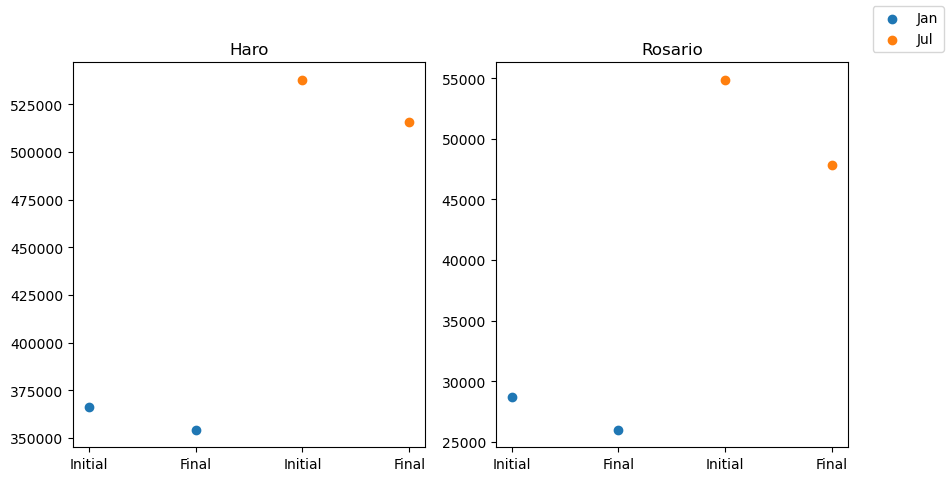

In [17]:
fig,ax = plt.subplots(1,2,figsize=(10,5))

ax[0].scatter([0,1],[init_saltfluxh/time,final_saltfluxh/time],label='Jan')
ax[0].scatter([2,3],[init_saltfluxh07/time,final_saltfluxh07/time],label='Jul')
ax[0].set_xticks([0,1,2,3])
ax[0].set_title('Haro')
fig.legend()
ax[0].set_xticklabels(['Initial','Final','Initial','Final'])
ax[1].scatter([0,1],[init_saltfluxr/time,final_saltfluxr/time])
ax[1].scatter([2,3],[init_saltfluxr07/time,final_saltfluxr07/time])
ax[1].set_xticks([0,1,2,3])
ax[1].set_xticklabels(['Initial','Final','Initial','Final'])
ax[1].set_title('Rosario')

/tmp/ipykernel_23070/359763449.py:10: RuntimeWarning: invalid value encountered in divide
  arr3 = arrw/arrnw
/tmp/ipykernel_23070/359763449.py:10: RuntimeWarning: invalid value encountered in divide
  arr3 = arrw/arrnw


Average age (admiralty): 119.50441915755171
Average age (rosario): 226.19846448157392
Average age(haro): 85.83986103857875


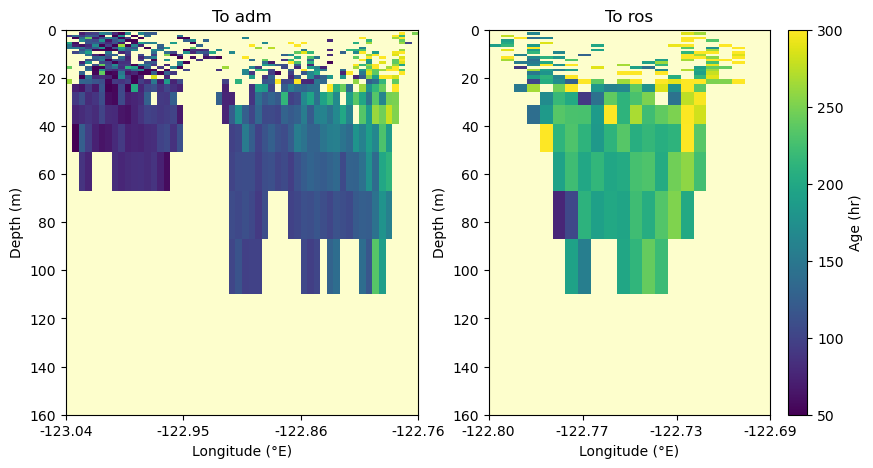

In [18]:
# Age of particles to rosario vs. admiralty

fig,[ax,ax2] = plt.subplots(1,2,figsize=(10,5))

plotTS(ax,'age',admfvs['final_lon'],admfvs['final_z'],admfvs['final_age'],lonWadm,lonEadm,30,time,'To adm',False,True,vmin=50,vmax=300)
plotTS(ax2,'age',rosfvs['final_lon'],rosfvs['final_z'],rosfvs['final_age'],lonWros,lonEros,30,time,'To ros',True,True,vmin=50,vmax=300)

print('Average age (admiralty):',np.mean(admfvs['final_age']))
print('Average age (rosario):',np.mean(rosfvs['final_age']))
print('Average age(haro):',np.mean(harofvs['final_age']))

/tmp/ipykernel_23070/359763449.py:10: RuntimeWarning: invalid value encountered in divide
  arr3 = arrw/arrnw
/tmp/ipykernel_23070/359763449.py:10: RuntimeWarning: invalid value encountered in divide
  arr3 = arrw/arrnw


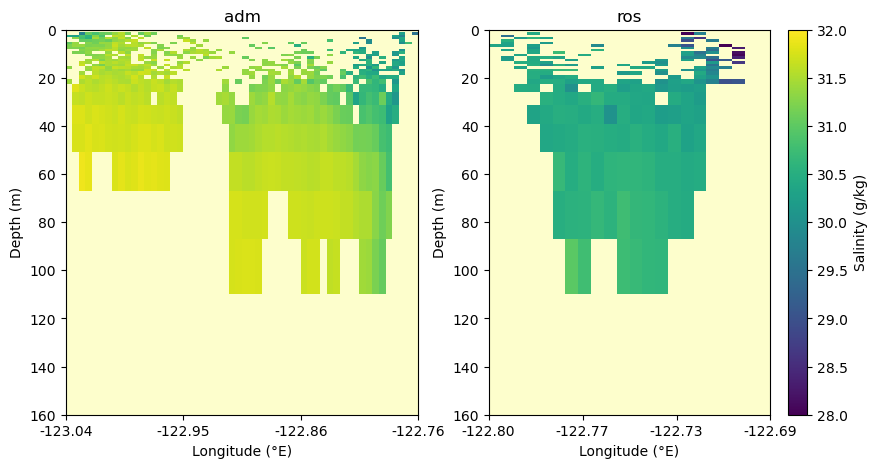

In [19]:
fig,[ax1,ax2] = plt.subplots(1,2,figsize=(10,5))

plotTS(ax1,'sal',admfvs['final_lon'],admfvs['final_z'],admfvs['final_salt'],lonWadm,lonEadm,30,time,'adm',False,True,vmin=smin,vmax=smax)
plotTS(ax2,'sal',rosfvs['final_lon'],rosfvs['final_z'],rosfvs['final_salt'],lonWros,lonEros,30,time,'ros',True,True,vmin=smin,vmax=smax)

Highest age is near the surface (mixing). Normally water moves slower in deep so age in deep would be larger? 

Faster to admiralty despite being similar distance?

In [20]:
# Split into salinity > and < 30.5

idx = np.where(rosfvs['final_salt']>=30,True,False)
age_lowsal = rosfvs['final_age'][idx]
idx = np.where(rosfvs['final_salt']<=30,True,False)
age_highsal = rosfvs['final_age'][idx]

print('Age (sal<=30):',np.mean(age_lowsal))
print('Age (sal>30):',np.mean(age_highsal))
print(np.std(age_lowsal))
print(np.std(age_highsal))


Age (sal<=30): 222.01938682720052
Age (sal>30): 307.3485542064982
71.56390442097215
73.52262895391127


Lower sal has lower age? Moving faster because closer to the surface?

/tmp/ipykernel_23070/359763449.py:10: RuntimeWarning: invalid value encountered in divide
  arr3 = arrw/arrnw


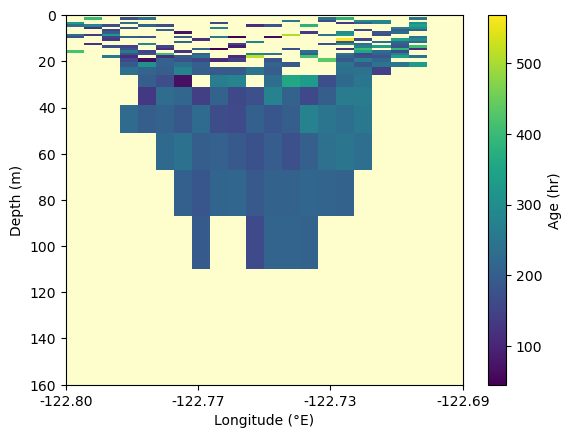

In [21]:
#Age from admiralty to rosario

datafas = xr.open_dataset('/ocean/cstang/MOAD/analysis-camryn/Ariane/foradm_jan18/for_straight_01jan18_s7t28/ariane_positions_quantitative.nc')

rosfas = get_secdata(datafas,4)

fig,ax = plt.subplots()

plotTS(ax,'age',rosfas['final_lon'],rosfas['final_z'],rosfas['final_age'],lonWros,lonEros,30,time,'',True,True)

In [22]:
# Salinity b/w 30-31

idx = np.where(admfvs['final_salt']>=30,admfvs['final_salt']<=31,True)

age_admr = admfvs['final_age'][idx]

idx2 = np.where(rosfvs['final_salt']>=30,rosfvs['final_salt']<=31,True)

age_rosr = rosfvs['final_age'][idx2]

print(np.mean(age_admr))
print(np.mean(age_rosr))


228.69811343255867
226.55977814894115


### Water Age

In [23]:
datafhspr

<xarray.Dataset>
Dimensions:        (ntraj: 73020)
Dimensions without coordinates: ntraj
Data variables: (12/25)
    init_x         (ntraj) float64 ...
    init_y         (ntraj) float64 ...
    init_z         (ntraj) float64 ...
    init_t         (ntraj) float64 ...
    init_age       (ntraj) timedelta64[ns] ...
    init_transp    (ntraj) float64 ...
    ...             ...
    init_lon       (ntraj) float64 ...
    init_lat       (ntraj) float64 ...
    init_depth     (ntraj) float64 ...
    final_lon      (ntraj) float64 ...
    final_lat      (ntraj) float64 ...
    final_depth    (ntraj) float64 ...
Attributes: (12/108)
    key_roms:                  .FALSE.
    key_mars:                  .FALSE.
    key_symphonie:             .FALSE.
    key_B2C_grid:              .FALSE.
    key_sequential:            .TRUE.
    key_alltracers:            .TRUE.
    ...                        ...
    ind0_sa:                   1
    indn_sa:                   28
    maxsize_sa:                6
    c_suffix_sa:               _grid_T.nc
    nc_var_sa:                 vosaline
    nc_att_mask_sa:            NONE

In [24]:
mdfhspr = get_secdata(datafhspr,0)

age_mdfhspr = mdfhspr['final_age']

transp_reffhspr = mdfhspr['final_transp'][age_mdfhspr >= 24]
transp_tmdfhspr = mdfhspr['final_transp'][age_mdfhspr<24]

ref = np.sum(transp_reffhspr)/time
total_md = np.sum(mdfhspr['final_transp'])/time
perc = ref/total_md
print(perc)
print(ref)
print(transp_reffhspr.size)
print(transp_tmdfhspr.size)



<xarray.DataArray 'final_transp' ()>
array(0.18282949)
<xarray.DataArray 'final_transp' ()>
array(67711.99409145)
9334
56001


In [25]:
mdbpr = get_secdata(databpr,0)
age_mdbpr = mdbpr['final_age']

transp_refbpr = np.sum(mdbpr['final_transp'][age_mdbpr >= 24])/timeb
total_md = np.sum(mdbpr['final_transp'])/timeb

print(total_md)
print(transp_refbpr)


<xarray.DataArray 'final_transp' ()>
array(336513.22058335)
<xarray.DataArray 'final_transp' ()>
array(34139.95431809)


In [26]:
#Calculating average age (when age > 24 hours) of all straits

avgage_fhspr = []

for section in range(7):
    age_fhspr = get_secdata(datafhspr,section)['final_age']
    idx = np.where(age_fhspr>=24,True,False)
    age_int = age_fhspr[idx]
    avgage_fhspr.append(np.mean(age_int))

print(avgage_fhspr)

[114.19767648737523, nan, 169.8742862073222, 266.1196677877519, 309.2415214624746, 221.73277030872214, 294.03245271939653]


/home/cstang/conda_envs/analysis-camryn/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/cstang/conda_envs/analysis-camryn/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [27]:
avgage_bpr = []

for section in range(7):
    age_bpr = get_secdata(databpr,section)['final_age']
    idx = np.where(age_bpr>24,True,False)
    age_int = age_bpr[idx]
    avgage_bpr.append(np.mean(age_int))
    
print(avgage_bpr)

[214.05400048076493, nan, 160.19029046780003, 249.06540764900734, 280.466359900287, 230.70690062155128, 181.9812754342276]


/home/cstang/conda_envs/analysis-camryn/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/cstang/conda_envs/analysis-camryn/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [28]:
avgage_fvs = []

for section in range(7):
    age_fvs = get_secdata(datafvs,section)['final_age']
    idx = np.where(age_fvs>=24,True,False)
    age_int = age_fvs[idx]
    avgage_fvs.append(np.mean(age_int))

print(avgage_fvs)

[100.91920055073999, nan, 120.79824521714156, 249.30436737738958, 226.19846448157392, 167.49596210115865, 102.52189211458581]


/home/cstang/conda_envs/analysis-camryn/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/cstang/conda_envs/analysis-camryn/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


# Transport without tidal pumping (age > 24 hours)

In [29]:
section_transpfvs = []
sectionnum = [0,2,3,4,5,6]

starttime = 1
endtime = 168

for section in sectionnum:
    section_transpfvs.append(get_datat(datafvs,section,starttime,endtime,))
    
section_transpfvs

[549714.7121161793,
 29441.356930736445,
 70.28909350509404,
 5921.754855595813,
 3674.0503695276143,
 76335.49015953543]

In [45]:
mdfvs = get_secdata(datafvs,0)
age_mdfvs = mdfvs['final_age']

transp_reffvs = np.sum(mdfvs['final_transp'][age_mdfvs >= 24])/168
total_md = np.sum(mdfvs['final_transp'])/168

print(total_md)
print(transp_reffvs)

section_transpfvs_md = np.array(section_transpfvs)
section_transpfvs_md[0] = transp_reffvs.values

<xarray.DataArray 'final_transp' ()>
array(549714.71211618)
<xarray.DataArray 'final_transp' ()>
array(51228.19727729)


In [44]:
datafvs07

section_transpfvs_jul = []

for section in sectionnum:
    section_transpfvs_jul.append(get_datat(datafvs07,section,starttime,endtime))
    
mdfvs_jul = get_secdata(datafvs07,0)
age_mdfvs_jul = mdfvs_jul['final_age']

transp_reffvs_jul = np.sum(mdfvs_jul['final_transp'][age_mdfvs_jul >= 24])/168
total_md_jul = np.sum(mdfvs_jul['final_transp'])/168

print(total_md_jul)
print(transp_reffvs_jul)

section_transpfvs_md_jul = np.array(section_transpfvs_jul)
section_transpfvs_md_jul[0] = transp_reffvs_jul.values

<xarray.DataArray 'final_transp' ()>
array(327423.05634854)
<xarray.DataArray 'final_transp' ()>
array(41304.53357312)


Text(0.5, 0, 'Final Boundary')

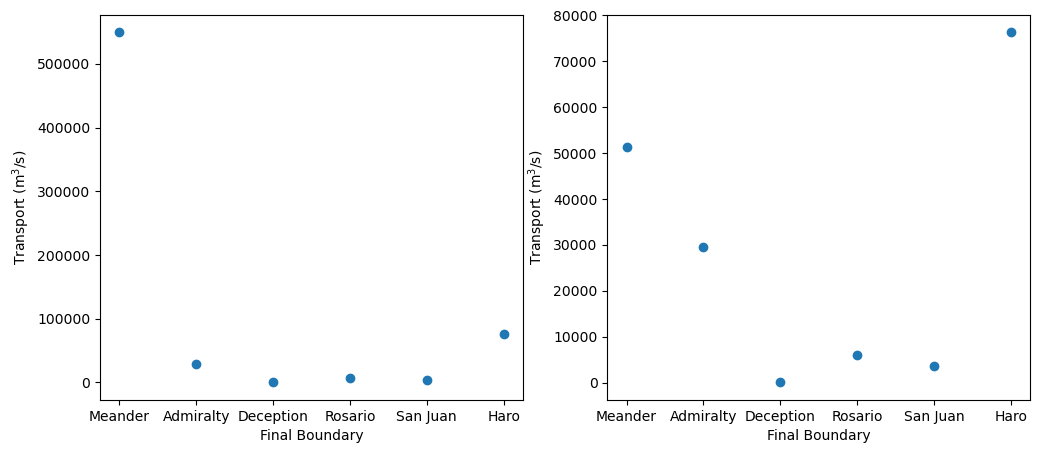

In [46]:
sectionnumplot=[1,2,3,4,5,6]

fig,ax =plt.subplots(1,2,figsize=(12,5))

ax[0].scatter(sectionnumplot,section_transpfvs)
ax[0].set_xticks(sectionnumplot)
ax[0].set_xticklabels(['Meander','Admiralty','Deception','Rosario','San Juan','Haro'])
ax[0].set_ylabel(f'Transport (m$^3$/s)')
ax[0].set_xlabel('Final Boundary')

ax[1].scatter(sectionnumplot,section_transpfvs_md)
ax[1].set_xticks(sectionnumplot)
ax[1].set_xticklabels(['Meander','Admiralty','Deception','Rosario','San Juan','Haro'])
ax[1].set_ylabel(f'Transport (m$^3$/s)')
ax[1].set_xlabel('Final Boundary')

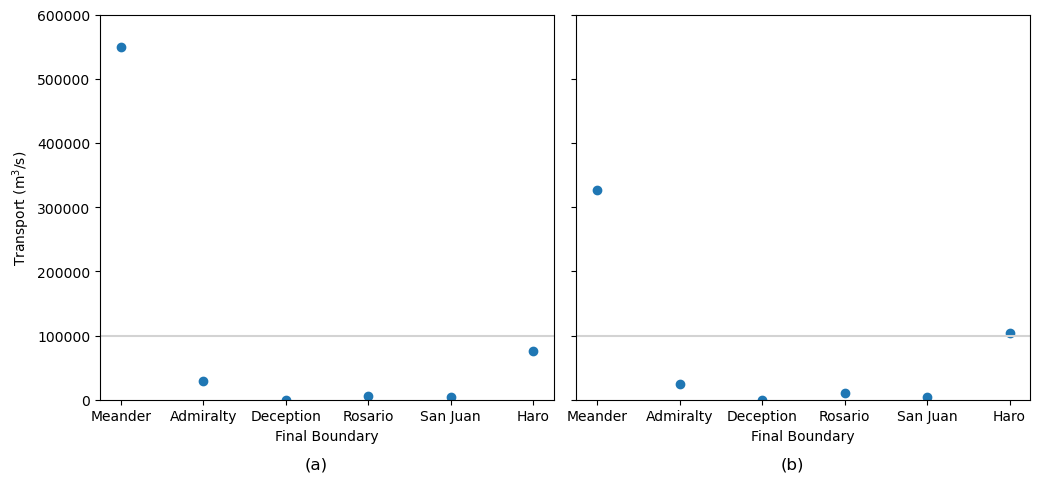

In [53]:

fig,ax =plt.subplots(1,2,figsize=(12,5))

ax[0].scatter(sectionnumplot,section_transpfvs)
ax[0].set_xticks(sectionnumplot)
ax[0].set_xticklabels(['Meander','Admiralty','Deception','Rosario','San Juan','Haro'])
ax[0].set_ylabel(f'Transport (m$^3$/s)')
ax[0].set_xlabel('Final Boundary')
ax[0].set_ylim([0,600000])
ax[0].axhline(100000,color='lightgrey')

ax[1].scatter(sectionnumplot,section_transpfvs_jul)
ax[1].set_xticks(sectionnumplot)
ax[1].set_xticklabels(['Meander','Admiralty','Deception','Rosario','San Juan','Haro'])
# ax[1].set_ylabel(f'Transport (m$^3$/s)')
ax[1].set_xlabel('Final Boundary')
ax[1].set_yticklabels([])
ax[1].set_ylim([0,600000])
ax[1].axhline(100000,color='lightgrey')

ax[0].text(0.45, -0.18, "(a)", transform=ax[0].transAxes, fontsize=12)
ax[1].text(0.45, -0.18, "(b)", transform=ax[1].transAxes, fontsize=12)

fig.subplots_adjust(wspace=0.05, hspace=0)

fig.savefig('/ocean/cstang/MOAD/analysis-camryn/Figures/transportVS.png',bbox_inches='tight')